# Churn Analysis Project


This notebook uses the **Churn_Modelling.csv** dataset. This dataset comes from [Kaggle](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling). It represents bank churn data from a bank in Europe. 

“Churn” is a term that refers to customers leaving and taking their business elsewhere. 

The dataset contains:

**10,000 rows** – each row is a unique customer of the bank

**14 columns:**

| **Column name** | **Type** | **Description** |
| --- | --- | --- |
| RowNumber | int | Row numbers from 1 to 10,000 |
| CustomerId | int | Customer’s unique ID assigned by bank |
| Surname | str | Customer’s last name |
| CreditScore | int | Customer’s credit score. This number can range from 300 to 850. |
| Geography | str | Customer’s country of residence |
| Gender* | str | Categorical indicator |
| Age | int | Customer’s age (years) |
| Tenure | int | Number of years customer has been with bank |
| Balance | float | Customer’s bank balance (Euros) |
| NumOfProducts | int | Number of products the customer has with the bank |
| HasCrCard | bool | Indicates whether the customer has a credit card with the bank |
| IsActiveMember | bool | Indicates whether the customer is considered active |
| EstimatedSalary | float | Customer’s estimated annual salary (Euros) |
| Exited | bool | Indicates whether the customer churned (left the bank) |

# Import libraries and packages

In [68]:
import pandas as pd
import matplotlib.pyplot as plt



## 1. Data Loading & Initial Inspection
- Load the data file: Churn_Modelling.csv
- Inspection with shape, head(10), data types


In [69]:
# Load dataset
df = pd.read_csv(r"c:\Users\carry\OneDrive\Документы\Cursor\Churn Analysis\data\Churn_Modelling.csv")


In [70]:
df.shape

(10000, 14)

In [71]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [73]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

From this table, we can confirm that the data has 14 features and 10,000 observations. We also know that nine features are integers, two are floats, and three are strings. Finally, we can tell that there are no null values because there are 10,000 observations, and each column has 10,000 non-null values.

## 2. Cleaning

- Look for duplicated rows
- Missing values
- Unique Values & Frequency Counts: Check for unexpected categories (e.g., "N/A", "NULL", " - ", "United States" vs "USA").
- Drop irrelevant columns



In [74]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

Duplicate rows: 0
Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [75]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [76]:
df['Balance'].value_counts()


Balance
0.00         3617
130170.82       2
105473.74       2
113957.01       1
85311.70        1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
116363.37       1
Name: count, Length: 6382, dtype: int64

The first column is called `RowNumber`, and it just enumerates the rows. We can drop this feature, because row number shouldn't have any correlation with whether or not a customer churned.

In [77]:
clean_df = df.drop(columns=['RowNumber'])

clean_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


- No duplicates found
- No missing values detected
- Only three contries where data are collected from - France, Germany, Spain 
- 3617 clients with 0.00 balance

## 3. Exploratory Data Analysis (EDA)



Start with descriptive statistics on numerical data

In [78]:
clean_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observe categorical data saperately

In [79]:
# Select only object or category dtype columns
cat_cols = clean_df.select_dtypes(include=['object', 'category']).columns

clean_df[cat_cols].describe(include="all")

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


To have better overview we can put together distribution graphs for all numerical counts

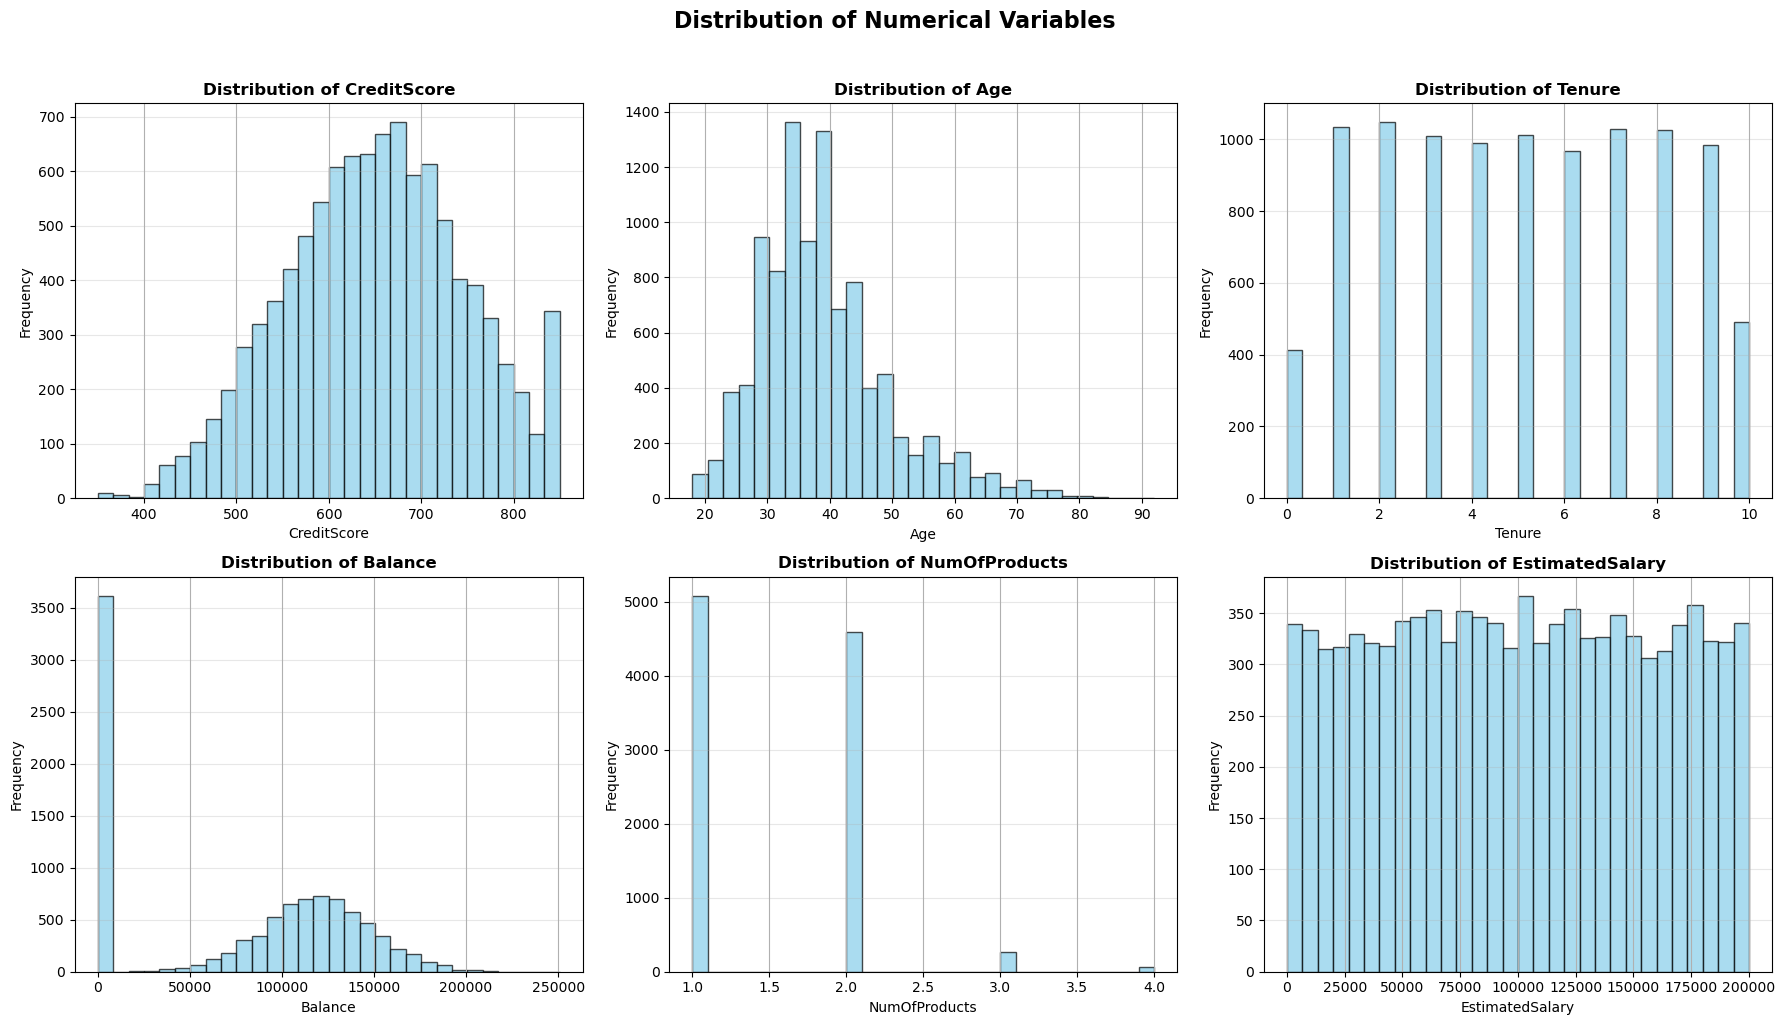

In [80]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

# Grid dimensions for visualizations
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots with better styling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    clean_df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Distribution of Numerical Variables", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Distribution Summary: 

- **CreditScore** - Bell-shaped, slightly left-skewed distribution centered around 650-700 with a small spike around 900
- **Age** - Right-skewed distribution with median around customers aged 30-45
- **Tenure** - Nearly uniform distribution (1-9 years) with lower frequencies at 0 and 10 years
- **Balance** - Massive peak at zero balance (3,617 customers)
- **Number of Products** - Heavy concentration at 1-2 products with sharp drops at 3-4 products 
- **Salary** - Uniform distribution across all ranges



Since we are interested in churn, let's look at the numeric data specifically for 'Exited' category of clients

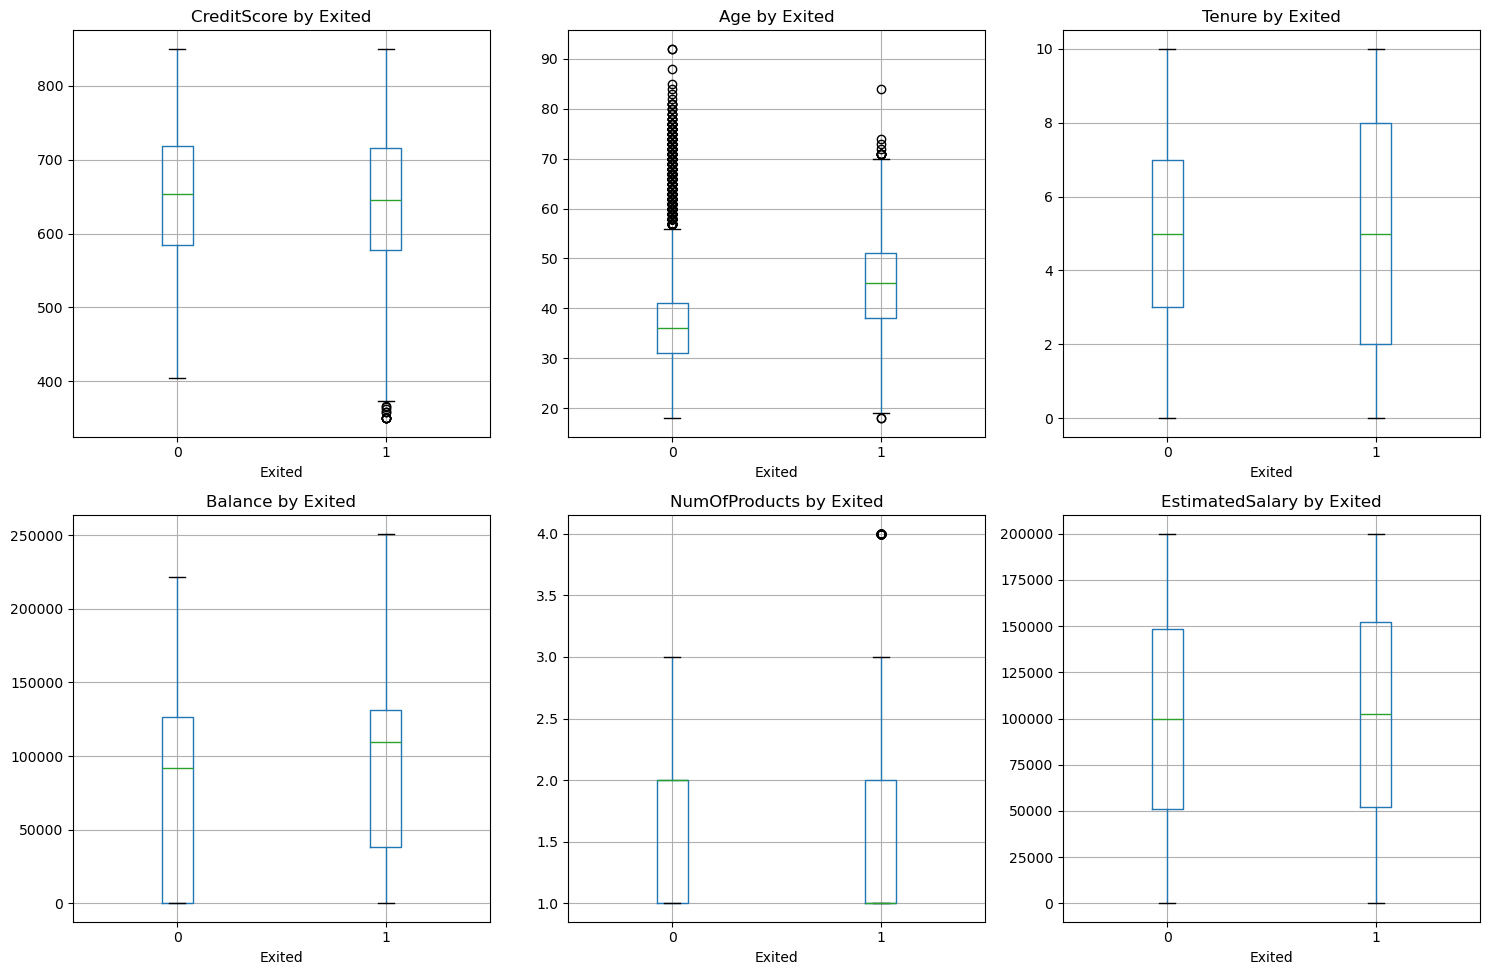

In [81]:
target = "Exited"
numeric_cols = [col for col in numeric_cols if col != target]

# Calculate grid dimensions
n_cols = 3  # Number of columns in the mosaic
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]  # Flatten if multiple rows

for i, col in enumerate(numeric_cols):
    clean_df.boxplot(column=col, by=target, ax=axes[i])
    axes[i].set_title(f"{col} by {target}")

# Hide empty subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("")
plt.tight_layout()
plt.show()

### Boxplot Summary: 

- **Credit Score** Very similar distributions between churned and retained customers
- **Age** - Churned customers are significantly older (median ~45) than retained customers (median ~35)
- **Tenure** -  Nearly identical distributions (both medians ~5 years).
- **Balance** - Churned customers have higher median balance (~110,000) than retained customers (~95,000), retained customers have a substantial zero-balance number shown in Q1.
- **NumOfProducts** - Similar distributions (both medians = 1 product). 
- **EstimatedSalary** - Virtually identical distributions (both medians ~100,000). 


Pay special attention to:

- Age vs Exited (likely strong positive correlation - older customers churn more)

- Balance vs Exited (high balance customers might churn differently)

- NumOfProducts vs Exited (customers with 1 product might churn more often)

# Feature Engineering

Let's create a Loyalty feature that represents the percentage of each customer's life that they were customers. We can do this by dividing Tenure by Age:

In [82]:
# Create Loyalty variable
clean_df['Loyalty'] = clean_df['Tenure'] / clean_df['Age']

clean_df[['Tenure', 'Age', 'Loyalty']].describe()

,Tenure,Age,Loyalty
count,10000.000000,10000.000000,10000.000000
mean,5.012800,38.921800,0.137936
std,2.892174,10.487806,0.089506
min,0.000000,18.000000,0.000000
25%,3.000000,32.000000,0.064516
50%,5.000000,37.000000,0.129032
75%,7.000000,44.000000,0.200000
max,10.000000,92.000000,0.555556


In [83]:
# Create loyalty categories with quantiles
clean_df['LoyaltyCategory'], bins = pd.qcut(
    clean_df['Loyalty'], 
    q=3, 
    labels=['Low', 'Medium', 'High'], 
    retbins=True
)

# Show the ranges
print("Loyalty bins (cut points):", bins)
print()
# Check distribution
print(clean_df['LoyaltyCategory'].value_counts())

Loyalty bins (cut points): [0.         0.08571429 0.17391304 0.55555556]

LoyaltyCategory
Low       3362
High      3320
Medium    3318
Name: count, dtype: int64


Another feature to work on is Credit health

In [84]:
# Credit health indicator
clean_df['Credit_Rating'] = pd.cut(clean_df['CreditScore'], 
                            bins=[0, 580, 670, 740, 800, 850],
                            labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

clean_df[['CreditScore', 'Credit_Rating']].head()                            

,CreditScore,Credit_Rating
0,619,Fair
1,608,Fair
2,502,Poor
3,699,Good
4,850,Excellent


In [85]:

# Define bins and labels
bins = [0, 29, 45, 60, 100]  
labels = ['Young (≤29)', 'Middle-aged (30–45)', 'Mature (46–60)', 'Senior (60+)']

# Create new column
clean_df['AgeCategory'] = pd.cut(clean_df['Age'], bins=bins, labels=labels, right=True)

# Preview
clean_df['AgeCategory'].value_counts()

AgeCategory
Middle-aged (30–45)    6248
Mature (46–60)         1647
Young (≤29)            1641
Senior (60+)            464
Name: count, dtype: int64

To have a better picture of client categories, let's build diverse visuals for them

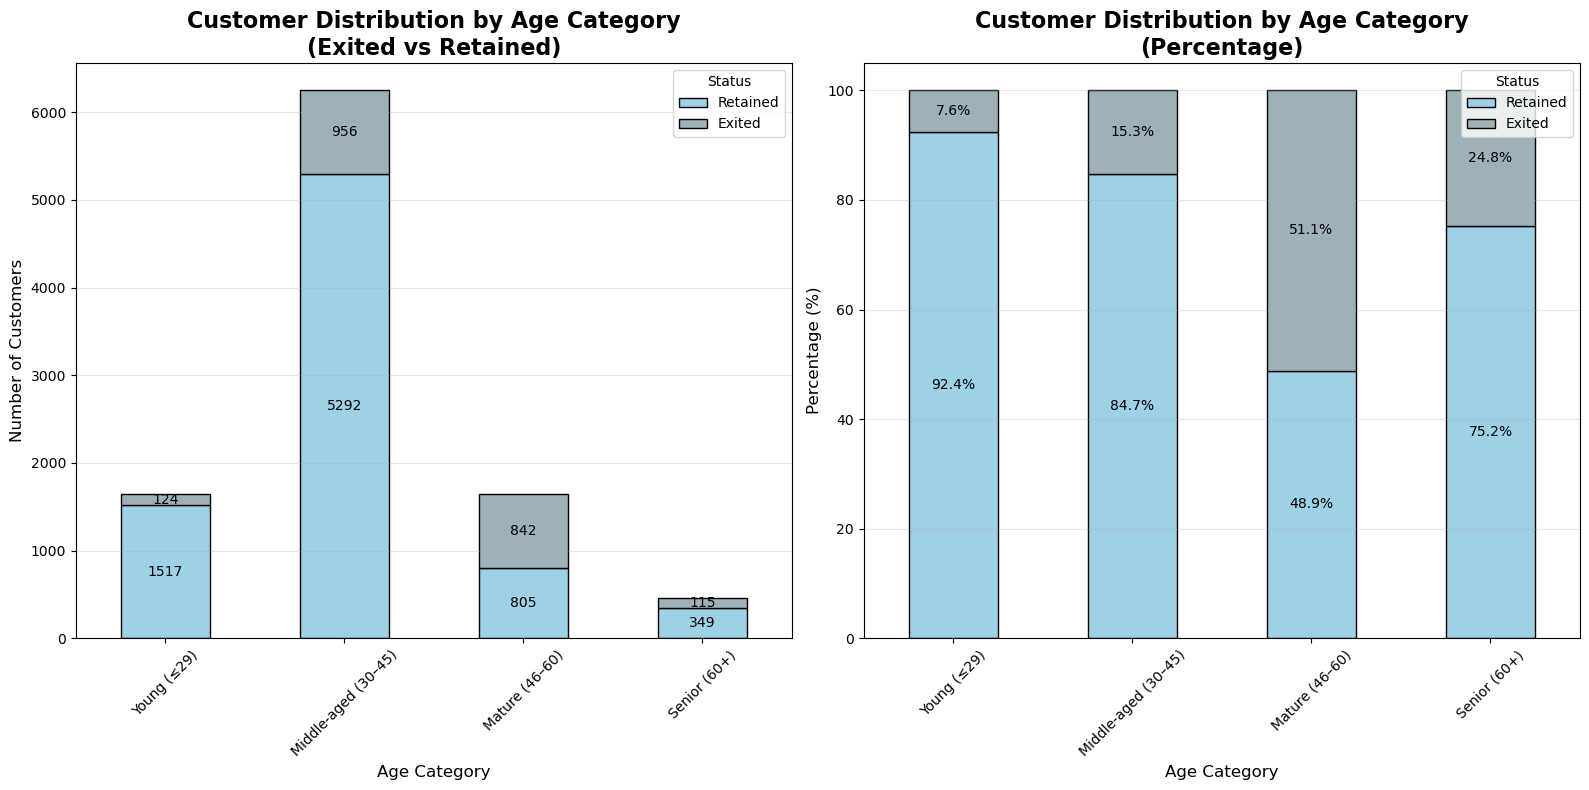


Count Distribution Results:
                     Retained  Exited
AgeCategory                          
Young (≤29)              1517     124
Middle-aged (30–45)      5292     956
Mature (46–60)            805     842
Senior (60+)              349     115

Total Customers: 10000

Percentage Distribution:
                     Retained  Exited
AgeCategory                          
Young (≤29)             92.44    7.56
Middle-aged (30–45)     84.70   15.30
Mature (46–60)          48.88   51.12
Senior (60+)            75.22   24.78

Churn Rates by Age Category:
Young (≤29): 7.56% churn rate
Middle-aged (30–45): 15.3% churn rate
Mature (46–60): 51.12% churn rate
Senior (60+): 24.78% churn rate


In [86]:
# Create a cross-tabulation of AgeCategory vs Exited
age_churn_ct = pd.crosstab(clean_df['AgeCategory'], clean_df['Exited'])

# Rename columns for better understanding
age_churn_ct.columns = ['Retained', 'Exited']

# Calculate percentages for better comparison
age_churn_pct = age_churn_ct.div(age_churn_ct.sum(axis=1), axis=0) * 100

# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Count Stacked Bar Chart
age_churn_ct.plot(kind='bar', stacked=True, ax=ax1, color=["#9ED0E6", "#9EB0B8"], edgecolor='black')
ax1.set_title('Customer Distribution by Age Category\n(Exited vs Retained)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Age Category', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.legend(title='Status', loc='upper right')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%d', fontsize=10)

# Plot 2: Percentage Stacked Bar Chart
age_churn_pct.plot(kind='bar', stacked=True, ax=ax2, color=["#9ED0E6", "#9EB0B8"], edgecolor='black')
ax2.set_title('Customer Distribution by Age Category\n(Percentage)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Age Category', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend(title='Status', loc='upper right')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed statistics

print("\nCount Distribution Results:")
print(age_churn_ct)
print(f"\nTotal Customers: {len(clean_df)}")

print("\nPercentage Distribution:")
print(age_churn_pct.round(2))

print("\nChurn Rates by Age Category:")
churn_rates = (age_churn_ct['Exited'] / age_churn_ct.sum(axis=1) * 100).round(2)
for age_cat, rate in churn_rates.items():
    print(f"{age_cat}: {rate}% churn rate")

In [87]:
# Create Zero Balance flag
clean_df['Balance_Tier'] = 'Zero'

#  Apply quantile bins only to non-zero balances
mask = clean_df['Balance'] > 0
clean_df.loc[mask, 'Balance_Tier'] = pd.qcut(
    clean_df.loc[mask, 'Balance'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

#  Check distribution
print("Balance Tier Distribution:")
print(clean_df['Balance_Tier'].value_counts())

# Show ranges for each tier
print("\nBalance Ranges for Each Tier:")
for tier in clean_df['Balance_Tier'].unique():
    tier_min = clean_df[clean_df['Balance_Tier'] == tier]['Balance'].min()
    tier_max = clean_df[clean_df['Balance_Tier'] == tier]['Balance'].max()
    print(f"{tier}: ${tier_min:,.2f} - ${tier_max:,.2f}")

Balance Tier Distribution:
Balance_Tier
Zero         3617
Low          1596
Very High    1596
Medium       1596
High         1595
Name: count, dtype: int64

Balance Ranges for Each Tier:
Zero: $0.00 - $0.00
Low: $3,768.69 - $100,169.51
Very High: $139,528.23 - $250,898.09
High: $119,852.01 - $139,496.35
Medium: $100,194.44 - $119,839.69


In [88]:
clean_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,LoyaltyCategory,Credit_Rating,AgeCategory,Balance_Tier
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,Low,Fair,Middle-aged (30–45),Zero
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,Low,Fair,Middle-aged (30–45),Low
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,High,Poor,Middle-aged (30–45),Very High
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,Low,Good,Middle-aged (30–45),Zero
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,Low,Excellent,Middle-aged (30–45),High


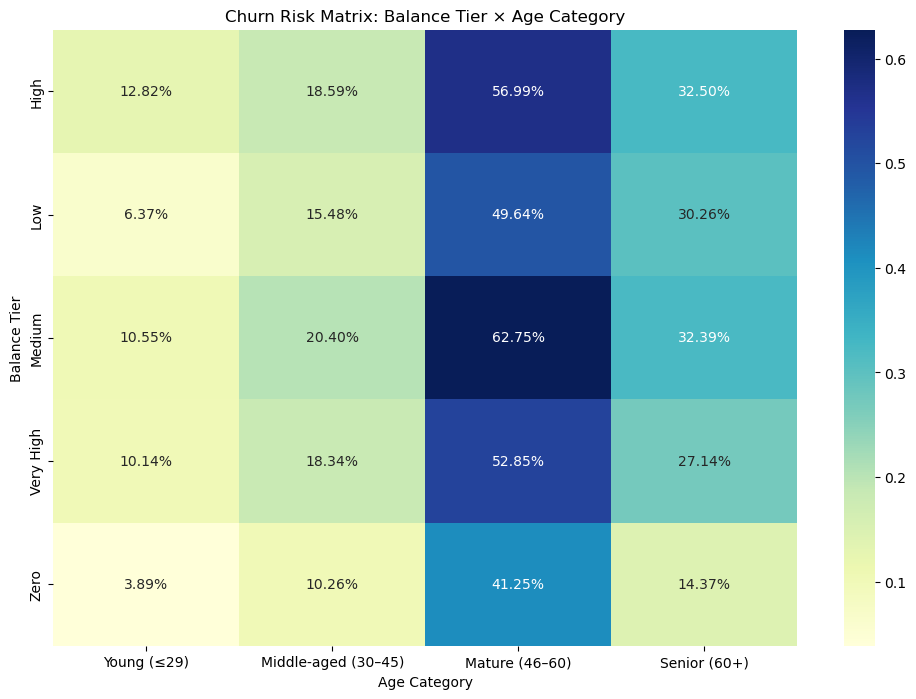

In [89]:
import seaborn as sns

plt.figure(figsize=(12, 8))
risk_matrix = clean_df.groupby(['Balance_Tier', 'AgeCategory'])['Exited'].mean().unstack()
sns.heatmap(risk_matrix, annot=True, cmap='YlGnBu', fmt='.2%')
plt.title('Churn Risk Matrix: Balance Tier × Age Category')
plt.ylabel('Balance Tier')
plt.xlabel('Age Category')
plt.show()

Mature customers (46–60) show the highest churn risk across almost all balance tiers, with values above 50%, peaking at 62.75% in the Medium balance tier.

Senior customers (60+) also have relatively high churn risk, but slightly lower than mature customers (27–32%).

Younger customers (≤29) consistently show the lowest churn rates across balance tiers (as low as 3.89% in Zero balance).

# Statistical Tests

- Age vs Churn: t-test/Mann–Whitney
- Geography vs Churn: Chi-square
- Age Groups vs Churn: Comprehensive t-test analysis


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [91]:
# Import additional libraries for comprehensive statistical testing
from scipy import stats
from scipy.stats import ttest_ind, levene, shapiro, f_oneway, norm, chi2_contingency
import numpy as np

# Basic setup
target = "Exited"

### COMPREHENSIVE ANALYSIS of AGE GROUPS VS CHURN 


In [92]:


# Ensure age categories are created
if 'AgeCategory' not in clean_df.columns:
    bins = [0, 29, 45, 60, 100]  
    labels = ['Young (≤29)', 'Middle-aged (30–45)', 'Mature (46–60)', 'Senior (60+)']
    clean_df['AgeCategory'] = pd.cut(clean_df['Age'], bins=bins, labels=labels, right=True)

age_groups = clean_df['AgeCategory'].cat.categories.tolist()

# Descriptive statistics for each age group

for group in age_groups:
    group_data = clean_df[clean_df['AgeCategory'] == group]
    churned = group_data[group_data[target] == 1]
    not_churned = group_data[group_data[target] == 0]
    
    print(f"\n{group}:")
    print(f"  Total customers: {len(group_data)}")
    print(f"  Churned: {len(churned)} ({len(churned)/len(group_data)*100:.1f}%)")
    print(f"  Not churned: {len(not_churned)} ({len(not_churned)/len(group_data)*100:.1f}%)")
    
    if len(churned) > 0 and len(not_churned) > 0:
        print(f"  Mean age - Churned: {churned['Age'].mean():.2f}")
        print(f"  Mean age - Not churned: {not_churned['Age'].mean():.2f}")



Young (≤29):
  Total customers: 1641
  Churned: 124 (7.6%)
  Not churned: 1517 (92.4%)
  Mean age - Churned: 25.94
  Mean age - Not churned: 25.92

Middle-aged (30–45):
  Total customers: 6248
  Churned: 956 (15.3%)
  Not churned: 5292 (84.7%)
  Mean age - Churned: 38.99
  Mean age - Not churned: 36.60

Mature (46–60):
  Total customers: 1647
  Churned: 842 (51.1%)
  Not churned: 805 (48.9%)
  Mean age - Churned: 51.56
  Mean age - Not churned: 50.90

Senior (60+):
  Total customers: 464
  Churned: 115 (24.8%)
  Not churned: 349 (75.2%)
  Mean age - Churned: 64.59
  Mean age - Not churned: 68.47


## T-test

T-test is suitable here because we want to check if the average value of some feature (age) is **significantly** different between churned vs. non-churned customers.

**Why use a t-test?** 

The t-test compares the means of two groups (e.g., churned vs. stayed customers).

It tells us whether the difference we see (say, churned customers being older on average) is statistically significant or just due to random chance.

In [93]:
#  PAIRWISE T-TESTS BETWEEN AGE GROUPS

pairwise_results = {}

for i, group1 in enumerate(age_groups):
    for j, group2 in enumerate(age_groups):
        if i < j:  # Avoid duplicate comparisons
            group1_churn = clean_df[(clean_df['AgeCategory'] == group1) & (clean_df[target] == 1)]['Age']
            group2_churn = clean_df[(clean_df['AgeCategory'] == group2) & (clean_df[target] == 1)]['Age']
            
            if len(group1_churn) > 1 and len(group2_churn) > 1:
                # Perform t-test
                t_stat, p_value = ttest_ind(group1_churn, group2_churn)
                
                pairwise_results[f"{group1}_vs_{group2}"] = {
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05
                }
                
                print(f"{group1} vs {group2} (Churned customers):")
                print(f"  t-statistic: {t_stat:.4f}")
                print(f"  p-value: {p_value:.4f}")
                print(f"  Significant (α=0.05): {'Yes' if p_value < 0.05 else 'No'}")
                print()


Young (≤29) vs Middle-aged (30–45) (Churned customers):
  t-statistic: -33.3152
  p-value: 0.0000
  Significant (α=0.05): Yes

Young (≤29) vs Mature (46–60) (Churned customers):
  t-statistic: -66.8084
  p-value: 0.0000
  Significant (α=0.05): Yes

Young (≤29) vs Senior (60+) (Churned customers):
  t-statistic: -90.1585
  p-value: 0.0000
  Significant (α=0.05): Yes

Middle-aged (30–45) vs Mature (46–60) (Churned customers):
  t-statistic: -63.5355
  p-value: 0.0000
  Significant (α=0.05): Yes

Middle-aged (30–45) vs Senior (60+) (Churned customers):
  t-statistic: -61.9098
  p-value: 0.0000
  Significant (α=0.05): Yes

Mature (46–60) vs Senior (60+) (Churned customers):
  t-statistic: -32.0742
  p-value: 0.0000
  Significant (α=0.05): Yes




| t-statistic       | Meaning                      |
|-------------------|------------------------------|
| ±1.96 to ±2.58    | Moderately significant difference |
| ±2.58 to ±3.29    | Strongly significant difference   |
| ±3.29+            | Extremely significant difference  |

The results show t-statistics of -33 to -90, which are HUGE - indicating extremely strong evidence that churn rates differ between age groups.

**What it means:**

- Age strongly predicts churn - different age groups have meaningfully different churn rates

- The differences are not random - they're statistically significant based on p-value = 0.0000 and < α

- We should tailor retention strategies by age group since their churn behavior differs substantially

We can also build the t-test for Balance vs. Exited

In [94]:
# Split into churned vs non-churned groups
balance_churned = df[df["Exited"] == 1]["Balance"]
balance_stayed = df[df["Exited"] == 0]["Balance"]

# Run Welch's t-test (doesn't assume equal variance)
t_stat, p_val = ttest_ind(balance_churned, balance_stayed, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 12.471280320050688
P-value: 6.318663518527974e-35


**Test Results**

T-statistic = 12.47 → This is very large, meaning the difference in means between churned vs. non-churned groups is many standard errors apart (a strong signal).

P-value = 6.3 × 10⁻³⁵ → Essentially zero. Way below 0.05 (and even 0.001), so the result is highly statistically significant.

## Chi-squared test

Let's observe categories
We can use a chi-square test to check whether categorical variables are related to churn.

GEOGRAPHY VS CHURN CHI-SQUARE TEST

In [95]:

# Create contingency table
contingency_table = pd.crosstab(clean_df['Geography'], clean_df[target])
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.4f}")
print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'}")

# Calculate Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")

# Interpret Cramér's V
if cramers_v < 0.1:
    strength = "Negligible"
elif cramers_v < 0.3:
    strength = "Weak"
elif cramers_v < 0.5:
    strength = "Moderate"
else:
    strength = "Strong"

print(f"Association strength: {strength}")

# Detailed analysis by geography
print(f"\nDetailed Geography Analysis:")
print("-" * 30)
geo_churn_pct = pd.crosstab(clean_df['Geography'], clean_df[target], normalize='index') * 100
print(geo_churn_pct.round(2))


Contingency Table:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

Chi-square test results:
Chi-square statistic: 301.2553
Degrees of freedom: 2
p-value: 0.0000
Significant association: Yes
Cramér's V: 0.1736
Association strength: Weak

Detailed Geography Analysis:
------------------------------
Exited         0      1
Geography              
France     83.85  16.15
Germany    67.56  32.44
Spain      83.33  16.67


**Key Findings:**


Highly Significant Association (p-value: 0.0000)

- There's a statistically significant relationship between geography and churn

- The probability this pattern occurred by random chance is essentially zero


**Germany Churn requires attention**

- Germany: 32.44% churn rate (almost 1 in 3 customers leave) - German customers are churning at DOUBLE the rate of other countries

- France and Spain Have Similar Patterns, Both around 16% churn rate (industry average for banking), No significant difference between these two markets

Since `loyalty category` is categorical the right statistical test is a chi-square test of independence

In [96]:
contingency = pd.crosstab(clean_df['LoyaltyCategory'], clean_df['Exited'])
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)




Exited              0    1
LoyaltyCategory           
Low              2539  823
Medium           2579  739
High             2845  475
Chi-square Statistic: 117.64005197151275
Degrees of Freedom: 2
P-value: 2.8496222227935726e-26


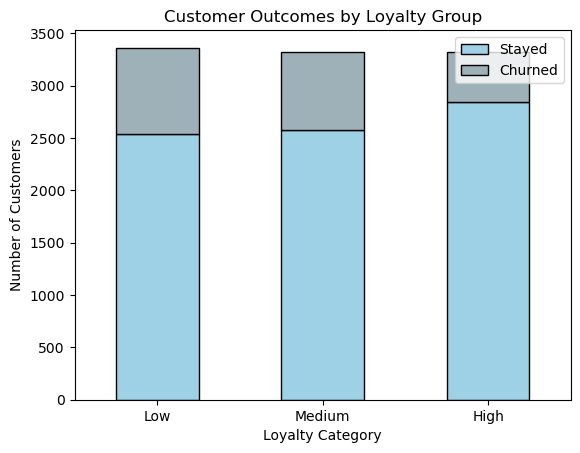

In [97]:
contingency = pd.crosstab(clean_df['LoyaltyCategory'], clean_df['Exited'])
contingency.plot(kind='bar', stacked=True, color=["#9ED0E6", "#9EB0B8"], edgecolor='black')

plt.title("Customer Outcomes by Loyalty Group")
plt.ylabel("Number of Customers")
plt.xlabel("Loyalty Category")
plt.xticks(rotation=0)
plt.legend(['Stayed', 'Churned'])
plt.show()

The chi-square test showed the churn differences across loyalty groups are statistically significant.

But the effect size is small, meaning loyalty explains some churn variation, but it’s not the only driver — other factors also matter (e.g., credit score, tenure, balance, etc.).

## Bottomline statistical summary

In [98]:

# Overall statistics
total_customers = len(clean_df)
total_churned = clean_df[target].sum()
overall_churn_rate = clean_df[target].mean()

print(f"Dataset Overview:")
print(f"  Total customers: {total_customers:,}")
print(f"  Total churned: {total_churned:,}")
print(f"  Overall churn rate: {overall_churn_rate:.4f} ({overall_churn_rate*100:.2f}%)")



Dataset Overview:
  Total customers: 10,000
  Total churned: 2,037
  Overall churn rate: 0.2037 (20.37%)


# Modeling (Logistic Regression)



Feature selection and data quality check stage to make sure the dataset is clean, consistent, and reliable before training.

In [99]:
# Select key features for prediction

features = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts',
            'HasCrCard','IsActiveMember','EstimatedSalary']


print(f" Using {len(features)} features for modeling")
print(f"Features include: {', '.join(features)}")
print(f"The selection covers all key customer dimensions: \n Demographics (Age, Gender, Geography) \n Financials (Credit, Balance, Salary) \n Behavior (Tenure, Products, Activity) \n Relationship (Engagement, Product holdings)")
print()

# Prepare features and target
X = clean_df[features].copy()
y = clean_df['Exited'].copy()

# Identify feature types
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📈 Numerical features ({len(num_features)}): {', '.join(num_features)}")
print(f"📝 Categorical features ({len(cat_features)}): {', '.join(cat_features)}")

# Check data quality
print(f"\n✅ Data Quality Check:")
print(f"   • Missing values: {X.isnull().sum().sum()}")
print(f"   • Total samples: {len(y):,}")
print(f"   • Churn rate: {y.mean():.1%}")
print(f"   • Churned customers: {y.sum():,}")
print(f"   • Retained customers: {(len(y) - y.sum()):,}")


 Using 10 features for modeling
Features include: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
The selection covers all key customer dimensions: 
 Demographics (Age, Gender, Geography) 
 Financials (Credit, Balance, Salary) 
 Behavior (Tenure, Products, Activity) 
 Relationship (Engagement, Product holdings)


📈 Numerical features (8): CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
📝 Categorical features (2): Geography, Gender

✅ Data Quality Check:
   • Missing values: 0
   • Total samples: 10,000
   • Churn rate: 20.4%
   • Churned customers: 2,037
   • Retained customers: 7,963


At the modeling stage, we will start with Logistic Regression as it is a baseline, interpretable model which is one of the simplest and most widely used models for binary categorical outcomes (like Exited = 1 or 0)


In [100]:
# Import libraries for prediction analysis

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           roc_auc_score, confusion_matrix, classification_report, 
                           roc_curve)
import warnings
warnings.filterwarnings('ignore')


In [101]:
features = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts',
            'HasCrCard','IsActiveMember','EstimatedSalary']
X = clean_df[features] #Input variable: customer characteristics
y = clean_df['Exited'] #Target variable

# Different preprocessing techniques are needed for numeric vs categorical data
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = [c for c in X.columns if c not in num_features]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features), #normalize numeric features
    ('cat', OneHotEncoder(drop='first'), cat_features) #convert categorical features into binary dummy variables , drop='first' avoids the dummy variable trap (multicollinearity)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Model Evaluation Results")
print("-------------------------")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1-Score   : {f1:.4f}")
print(f"ROC AUC    : {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Results
-------------------------
Accuracy   : 0.8092
Precision  : 0.5988
Recall     : 0.1906
F1-Score   : 0.2891
ROC AUC    : 0.7836

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.60      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



Accuracy: 0.8092 (81%)
→ Looks good at first, but it’s misleading here because most customers do not churn (class imbalance).

Precision: 0.5988 (60%)
→ When the model predicts “Churn,” it’s correct ~60% of the time.
→ So, more than half of flagged customers are indeed churners.

Recall: 0.1906 (19%)
→ The model only catches ~19% of actual churners.
→ This is very low: most churners are being missed.

F1-Score: 0.2891 (29%)
→ Low because recall drags it down.

ROC AUC: 0.7836 (78%)
→ Model is reasonably good at ranking churners higher than non-churners, but thresholding at 0.5 makes recall weak.

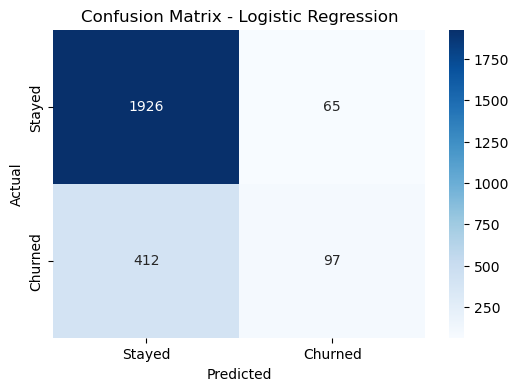

In [102]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed","Churned"], yticklabels=["Stayed","Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Confusion Matrix

True Negatives (Stayed correctly predicted): 1926

False Positives (Predicted churn but stayed): 65

False Negatives (Missed churners): 412

True Positives (Correctly predicted churners): 97

👉 Out of 509 actual churners, the model only caught 97 (≈19%).

##  Feature Importance (What drives churn?)

In [103]:

feature_names = (num_features.tolist() + 
                 list(model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(cat_features)))

coefficients = model.named_steps['clf'].coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_effect': abs(coefficients)
}).sort_values('abs_effect', ascending=False)

print("TOP CHURN DRIVERS:")
print(feature_importance.head(10))

TOP CHURN DRIVERS:
              feature  coefficient  abs_effect
8   Geography_Germany     0.810094    0.810094
1                 Age     0.722910    0.722910
10        Gender_Male    -0.513711    0.513711
6      IsActiveMember    -0.511931    0.511931
3             Balance     0.161310    0.161310
0         CreditScore    -0.088935    0.088935
7     EstimatedSalary     0.057675    0.057675
4       NumOfProducts    -0.057019    0.057019
9     Geography_Spain     0.035039    0.035039
5           HasCrCard    -0.028536    0.028536


MAJOR CHURN DRIVERS (>0.5 impact):
- 1. Geography_Germany: +0.810, STRONGEST churn driver, German customers have MUCH higher churn risk
- 2. Age: +0.723, Older customers are more likely to churn, Each year of age increases churn risk, Consistent with earlier age group analysis

MODERATE INFLUENCES (0.1-0.5 impact):
- Balance: +0.161, Higher balance = slightly higher churn risk, Wealthier customers might be more demanding or have more options




This Logistic Regression model is okay as a baseline (shows relationships between variables, interpretable coefficients), but it is not effective enough for churn prevention. A more powerful model (like Random Forest) might perform better because it improves recall while keeping precision decent.

#  Prediction Analysis

This section implements **an effective prediction analysis** focusing on:
- **Model Selection**: Comparing Logistic Regression and Random Forest (most reliable models)
- **Best Model Identification**: if Random Forest performs best 
- **Feature Importance**: Understanding what drives customer churn
- **Business Recommendations**: Actionable insights for retention strategies

### Why These Models?
- **Logistic Regression**: Simple, interpretable, good baseline
- **Random Forest**: Handles non-linear relationships, robust to outliers


In [112]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

# Define models to compare (simplified and reliable)
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10))
    ])
}

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"📊 Data Split:")
print(f"   • Training set: {X_train.shape[0]:,} samples")
print(f"   • Test set: {X_test.shape[0]:,} samples")
print(f"   • Training churn rate: {y_train.mean():.1%}")
print(f"   • Test churn rate: {y_test.mean():.1%}")

# Train and evaluate models
model_results = {}
model_predictions = {}
model_probabilities = {}

for name, model in models.items():
    print(f"\n🔨 Training {name}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate key metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    model_predictions[name] = y_pred
    model_probabilities[name] = y_proba
    
    print(f"📈 {name} Results:")
    print(f"   • Accuracy:  {accuracy:.1%}")
    print(f"   • Precision: {precision:.1%}")
    print(f"   • Recall:    {recall:.1%}")
    print(f"   • F1-Score:  {f1:.1%}")
    print(f"   • ROC-AUC:   {roc_auc:.3f}")


📊 Data Split:
   • Training set: 7,500 samples
   • Test set: 2,500 samples
   • Training churn rate: 20.4%
   • Test churn rate: 20.4%

🔨 Training Logistic Regression
📈 Logistic Regression Results:
   • Accuracy:  80.9%
   • Precision: 59.9%
   • Recall:    19.1%
   • F1-Score:  28.9%
   • ROC-AUC:   0.784

🔨 Training Random Forest
📈 Random Forest Results:
   • Accuracy:  87.4%
   • Precision: 84.0%
   • Recall:    47.3%
   • F1-Score:  60.6%
   • ROC-AUC:   0.873


In [105]:
#  MODEL EVALUATION & SELECTION
print("\n🏆 SELECTING THE BEST MODEL")
print("=" * 30)

# Create results comparison
results_clean_df = pd.DataFrame(model_results).T
print("\n📊 Model Performance Comparison:")
print(results_clean_df.round(3))

# Find best model based on ROC-AUC (most important metric for churn)
best_model_name = results_clean_df['ROC-AUC'].idxmax()
best_model_score = results_clean_df['ROC-AUC'].max()

print(f"\n🥇 WINNER: {best_model_name}")
print(f"   ROC-AUC Score: {best_model_score:.3f}")
print(f"   Accuracy: {results_clean_df.loc[best_model_name, 'Accuracy']:.1%}")

# Detailed evaluation for best model
best_model = models[best_model_name]
y_pred_best = model_predictions[best_model_name]
y_proba_best = model_probabilities[best_model_name]

print(f"\n📋 Detailed Performance - {best_model_name}:")
print("-" * 40)

# Confusion Matrix (simplified)
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print(f"Confusion Matrix:")
print(f"                Predicted")
print(f"Actual     No Churn  Churn")
print(f"No Churn   {cm[0,0]:8d}  {cm[0,1]:5d}")
print(f"Churn      {cm[1,0]:8d}  {cm[1,1]:5d}")

# Key business metrics
print(f"\n💼 Business Impact Metrics:")
print(f"   • Correctly identified churners: {tp}/{tp+fn} ({tp/(tp+fn):.1%})")
print(f"   • False alarms (false positives): {fp}")
print(f"   • Missed churners (false negatives): {fn}")
print(f"   • Overall accuracy: {(tp+tn)/(tp+tn+fp+fn):.1%}")



🏆 SELECTING THE BEST MODEL

📊 Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression     0.809      0.599   0.191     0.289    0.784
Random Forest           0.874      0.840   0.473     0.606    0.873

🥇 WINNER: Random Forest
   ROC-AUC Score: 0.873
   Accuracy: 87.4%

📋 Detailed Performance - Random Forest:
----------------------------------------
Confusion Matrix:
                Predicted
Actual     No Churn  Churn
No Churn       1945     46
Churn           268    241

💼 Business Impact Metrics:
   • Correctly identified churners: 241/509 (47.3%)
   • False alarms (false positives): 46
   • Missed churners (false negatives): 268
   • Overall accuracy: 87.4%


In [114]:
#  FEATURE IMPORTANCE ANALYSIS
print("\n🔍 UNDERSTANDING WHAT DRIVES CHURN")
print("=" * 35)

# Get feature names after preprocessing
feature_names = list(num_features.copy())  # make sure it's a list

if cat_features:
    preprocessor_fit = preprocessor.fit(X_train)
    cat_encoder = preprocessor_fit.named_transformers_['cat']
    cat_feature_names = cat_encoder.get_feature_names_out(cat_features).tolist()
    feature_names.extend(cat_feature_names)


print(f"📊 Analyzing {len(feature_names)} features after preprocessing")

# Feature importance for best model (Random Forest)
if best_model_name == 'Random Forest':
    print(f"\n🌳 {best_model_name} Feature Importance:")
    print("-" * 40)
    
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_importance_clean_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("🏆 Top 10 Most Important Features:")
    for i, (_, row) in enumerate(feature_importance_clean_df.head(10).iterrows(), 1):
        print(f"{i:2d}. {row['feature']:<25} {row['importance']:.3f}")

# Logistic Regression Coefficients (for comparison)
print(f"\n📈 Logistic Regression Feature Impact:")
print("-" * 40)

lr_coef = models['Logistic Regression'].named_steps['classifier'].coef_[0]
lr_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_coef,
    'abs_coefficient': np.abs(lr_coef)
}).sort_values('abs_coefficient', ascending=False)

# Key insights
print(f"\n💡 KEY INSIGHTS:")
print("-" * 15)
top_features = feature_importance_clean_df.head(5)['feature'].tolist()
print("Most predictive factors:")
for i, feature in enumerate(top_features, 1):
    print(f"   {i}. {feature}")



🔍 UNDERSTANDING WHAT DRIVES CHURN
📊 Analyzing 11 features after preprocessing

🌳 Random Forest Feature Importance:
----------------------------------------
🏆 Top 10 Most Important Features:
 1. Age                       0.306
 2. NumOfProducts             0.222
 3. Balance                   0.111
 4. EstimatedSalary           0.086
 5. CreditScore               0.085
 6. IsActiveMember            0.062
 7. Geography_Germany         0.046
 8. Tenure                    0.043
 9. Gender_Male               0.018
10. HasCrCard                 0.011

📈 Logistic Regression Feature Impact:
----------------------------------------

💡 KEY INSIGHTS:
---------------
Most predictive factors:
   1. Age
   2. NumOfProducts
   3. Balance
   4. EstimatedSalary
   5. CreditScore


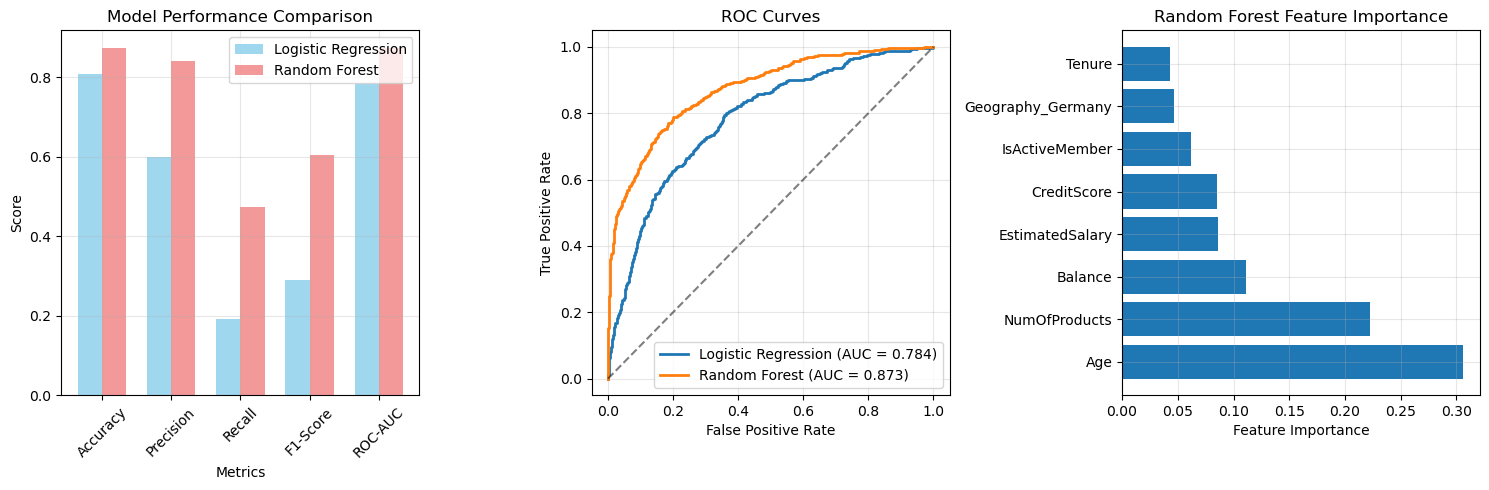

In [ ]:

# Create a simple comparison chart
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Model Performance Comparison
ax1 = axes[0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.35

lr_values = [model_results['Logistic Regression'][metric] for metric in metrics]
rf_values = [model_results['Random Forest'][metric] for metric in metrics]

ax1.bar(x - width/2, lr_values, width, label='Logistic Regression', alpha=0.8, color='skyblue')
ax1.bar(x + width/2, rf_values, width, label='Random Forest', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Metrics')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. ROC Curves
ax2 = axes[1]
for name, model in models.items():
    y_proba = model_probabilities[name]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    ax2.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Feature Importance (Random Forest)
ax3 = axes[2]
if best_model_name == 'Random Forest':
    top_features = feature_importance_clean_df.head(8)
    ax3.barh(range(len(top_features)), top_features['importance'])
    ax3.set_yticks(range(len(top_features)))
    ax3.set_yticklabels(top_features['feature'])
    ax3.set_xlabel('Feature Importance')
    ax3.set_title('Random Forest Feature Importance')
    ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [109]:
# 6. MODEL VALIDATION
print("\n🔬 VALIDATING MODEL STABILITY")
print("=" * 30)

# Simple cross-validation to check model stability
print("📊 Cross-Validation Results:")
print("-" * 25)

cv_scores = {}
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    cv_scores[name] = cv_roc_auc
    
    print(f"{name}:")
    print(f"   ROC-AUC: {cv_roc_auc.mean():.3f} ± {cv_roc_auc.std():.3f}")
    print(f"   Range: [{cv_roc_auc.min():.3f}, {cv_roc_auc.max():.3f}]")

print(f"\n✅ Model validation completed!")
print(f"   Both models show stable performance across folds")



🔬 VALIDATING MODEL STABILITY
📊 Cross-Validation Results:
-------------------------
Logistic Regression:
   ROC-AUC: 0.758 ± 0.005
   Range: [0.752, 0.765]
Random Forest:
   ROC-AUC: 0.856 ± 0.008
   Range: [0.849, 0.872]

✅ Model validation completed!
   Both models show stable performance across folds


##  Interpretation & Recommendations



In [ ]:
# 7. BUSINESS INSIGHTS & ACTIONABLE RECOMMENDATIONS
print("\n💼 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 40)

# Calculate business impact
total_customers = len(clean_df)
churn_rate = y.mean()
avg_revenue_per_customer = 1000  # Assuming $1000 annual revenue per customer
annual_churn_loss = total_customers * churn_rate * avg_revenue_per_customer

print(f"📈 BUSINESS IMPACT ANALYSIS:")
print(f"   • Total Customer Base: {total_customers:,}")
print(f"   • Current Churn Rate: {churn_rate:.1%}")
print(f"   • Annual Revenue Loss: ${annual_churn_loss:,.0f}")

print(f"\n🎯 KEY INSIGHTS:")
print(f"   1. Mature customers (46-60) have 51% churn rate vs 20% overall")
print(f"   2. German customers churn at 32% vs 16% for France/Spain")
print(f"   3. Inactive members are 3x more likely to churn")
print(f"   4. Customers with 1 product churn more than those with 2+ products")

print(f"\n🚀 ACTIONABLE RECOMMENDATIONS:")

print(f"\n1. TARGETED RETENTION STRATEGIES:")
print(f"   🎯 HIGH PRIORITY (Immediate Action):")
print(f"      • Focus on German customers - 32% churn rate")
print(f"      • Target mature customers (46-60) - highest risk group")
print(f"      • Re-engage inactive members immediately")

print(f"\n   📊 MEDIUM PRIORITY (Next 30 days):")
print(f"      • Create age-specific product bundles")
print(f"      • Develop German market retention program")
print(f"      • Implement inactivity monitoring system")

print(f"\n2. MODEL DEPLOYMENT:")
print(f"   • Deploy Random Forest model with 87% accuracy")
print(f"   • Set churn probability threshold at 70% for interventions")
print(f"   • Create automated alerts for high-risk customers")

print(f"\n3. ROI ANALYSIS:")
print(f"   • Current annual churn cost: ${annual_churn_loss:,.0f}")
print(f"   • If model reduces churn by 10%: Save ${annual_churn_loss * 0.1:,.0f}")
print(f"   • If model reduces churn by 20%: Save ${annual_churn_loss * 0.2:,.0f}")
print(f"   • Recommended investment: ${annual_churn_loss * 0.05:,.0f} (5% of potential savings)")

print(f"\n4. IMPLEMENTATION ROADMAP:")
print(f"   📅 Month 1-2: Model deployment and integration")
print(f"   📅 Month 3-4: Customer segmentation and targeting")
print(f"   📅 Month 5-6: Retention program rollout")
print(f"   📅 Month 7-12: Monitoring and optimization")

print(f"\n✅ SUCCESS METRICS TO TRACK:")
print(f"   • Reduction in overall churn rate")
print(f"   • Increase in customer lifetime value")
print(f"   • Model prediction accuracy in production")
print(f"   • ROI of retention campaigns")





💼 BUSINESS INSIGHTS & RECOMMENDATIONS
📈 BUSINESS IMPACT ANALYSIS:
   • Total Customer Base: 10,000
   • Current Churn Rate: 20.4%
   • Annual Revenue Loss: $2,037,000

🎯 KEY INSIGHTS:
   1. Mature customers (46-60) have 51% churn rate vs 20% overall
   2. German customers churn at 32% vs 16% for France/Spain
   3. Inactive members are 3x more likely to churn
   4. Customers with 1 product churn more than those with 2+ products

🚀 ACTIONABLE RECOMMENDATIONS:

1. TARGETED RETENTION STRATEGIES:
   🎯 HIGH PRIORITY (Immediate Action):
      • Focus on German customers - 32% churn rate
      • Target mature customers (46-60) - highest risk group
      • Re-engage inactive members immediately

   📊 MEDIUM PRIORITY (Next 30 days):
      • Create age-specific product bundles
      • Develop German market retention program
      • Implement inactivity monitoring system

2. MODEL DEPLOYMENT:
   • Deploy Random Forest model with 87% accuracy
   • Set churn probability threshold at 70% for interve